# Diamond Price Prediction Dataset

Diamond price prediction is a complex task that depends on various factors such as market demand, supply, economic conditions, and consumer preferences. It's important to note that predicting the exact future price of diamonds is challenging and subject to uncertainties.

However, certain trends and factors can influence diamond prices over time. Here are a few key considerations:

Economic conditions: Diamond prices are often influenced by the overall economic climate. During periods of economic growth and stability, consumer confidence tends to be higher, leading to increased demand for luxury goods like diamonds. Conversely, during economic downturns, demand may decrease, affecting prices.

Supply and production: The availability of diamonds plays a crucial role in pricing. Factors such as mining production, exploration efforts, and diamond reserves can impact supply levels. If new diamond deposits are discovered or production increases significantly, it may affect prices. Conversely, limited supply due to mine closures or depletion of resources can potentially drive prices up.

Market trends and consumer preferences: Changing consumer tastes and trends can also influence diamond prices. For example, shifts in preferences towards certain diamond shapes, sizes, colours, or ethical sourcing can affect the value of specific diamonds in the market.

Diamond grading and certification: The quality and grading of diamonds, as determined by gemological laboratories, impact their value. High-quality diamonds with superior cut, clarity, colour, and carat weight generally command higher prices.

It's important to remember that these factors interact in a dynamic and often unpredictable manner. Therefore, accurately predicting diamond prices requires in-depth analysis, market knowledge, and expertise in the diamond industry.

If you are considering buying or selling diamonds, it is advisable to consult with a professional, such as a gemologist or a reputable jeweller, who can provide you with up-to-date market information and guidance based on your specific requirements.

I am Creating This Machine Learning Model to Predict Pricing Based of these Factors.

Feature description:

price price in US dollars ($326--$18,823)This is the target column containing tags for the features. 

The 4 Cs of Diamonds:-

carat (0.2--5.01) The carat is the diamond’s physical weight measured in metric carats.  One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs. 

cut (Fair, Good, Very Good, Premium, Ideal) In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye.  

color, from J (worst) to D (best) The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.  

clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.  

Dimensions

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

diamands%20project%20%281%29.png

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79) The depth of the diamond is its height (in millimetres) measured from the culet (bottom tip) to the table (flat, top surface).

table width of the top of the diamond relative to widest point (43--95)

A diamond's table refers to the flat facet of the diamond seen when the stone is face up. The main purpose of a diamond table is to refract entering light rays and allow reflected light rays from within the diamond to meet the observer’s eye. The ideal table cut diamond will give the diamond stunning fire and brilliance.

# Import Liberaries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# Dataset Loading

In [2]:
diamond=pd.read_csv("diamonds.csv")
diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamond.shape

(53940, 11)

This dataset is a classic collection containing information about nearly 53,940 diamonds, including their prices and other attributes. The dataset consists of 10 attributes, with the target attribute being the price of the diamonds.

Here Unnamed 0 is of No Use So we are droping 

In [4]:
diamond.drop('Unnamed: 0', axis=1, inplace=True)

# Exploratory Data Analysis

Steps Involved in this are:-
    1. Data cleaning
    2.Identifying and removing outliers
    3.Encoding categorical variables
    4.Null Value Treatment

In [5]:
diamond.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

Here We Can Clearly See that There is not a single Null Value in this Dataset

In [6]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


The presence of zero as the minimum value for "x," "y," and "z" suggests the existence of faulty data points representing dimensionless or 2-dimensional diamonds. To ensure data accuracy, it is necessary to filter out these specific data points.

In [8]:
diamond = diamond.drop(diamond[diamond["x"]==0].index)
diamond = diamond.drop(diamond[diamond["y"]==0].index)
diamond = diamond.drop(diamond[diamond["z"]==0].index)

In [9]:
diamond.describe() #now it looks good 

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
diamond.shape 

(53920, 10)

As per here We Had Lost 20 Data Points in Data Cleaning

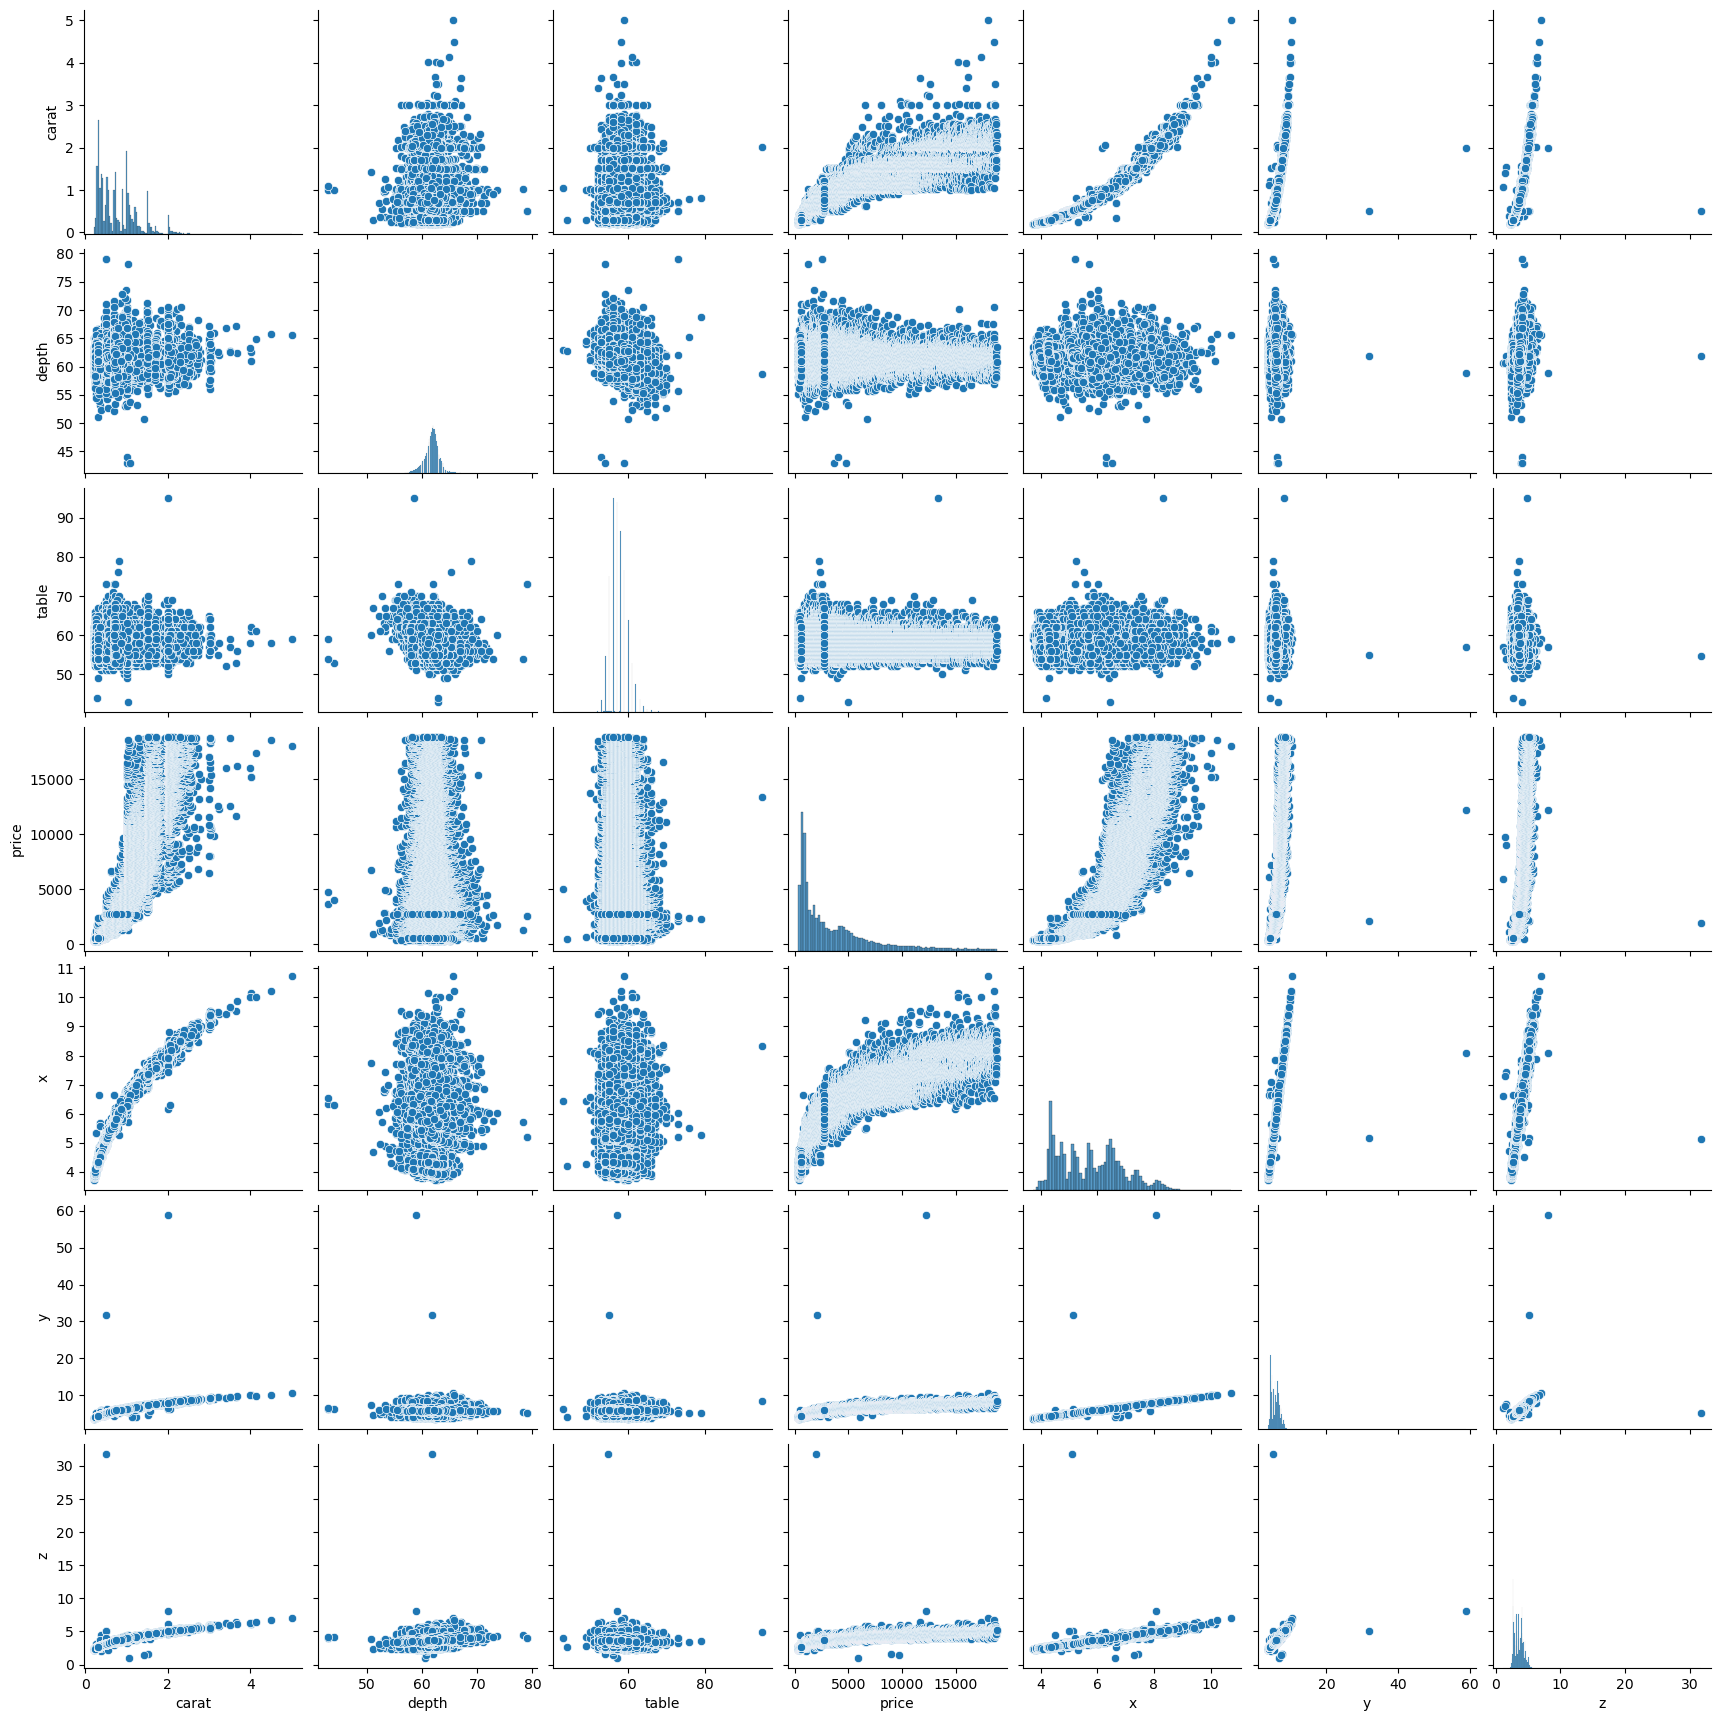

In [11]:
sns.pairplot(diamond)

Lets Seprate Numerical and Categorical Column

In [12]:
num_cols = diamond.select_dtypes('number')
cat_cols = diamond.select_dtypes('O')
for c in cat_cols.columns:
    print(cat_cols[c].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


Visualizing the Numerical variables distribution

carat
Skewness :  1.116


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


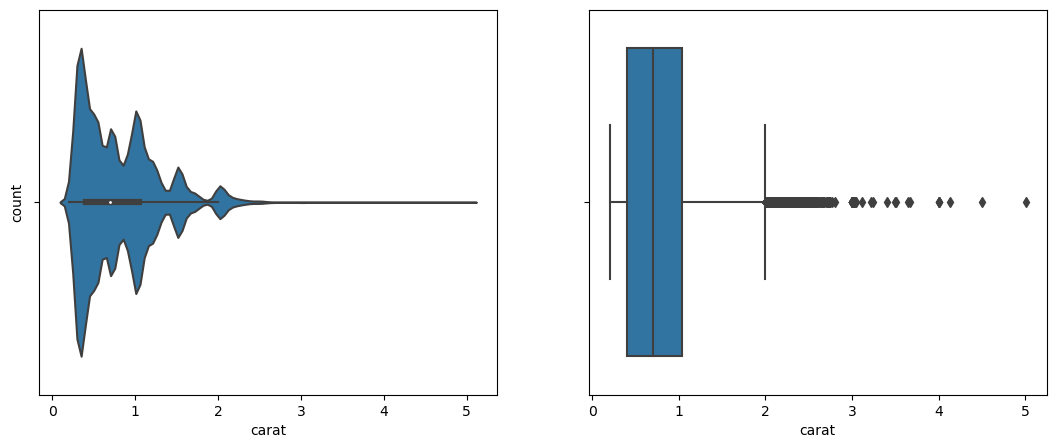

depth
Skewness :  -0.082


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


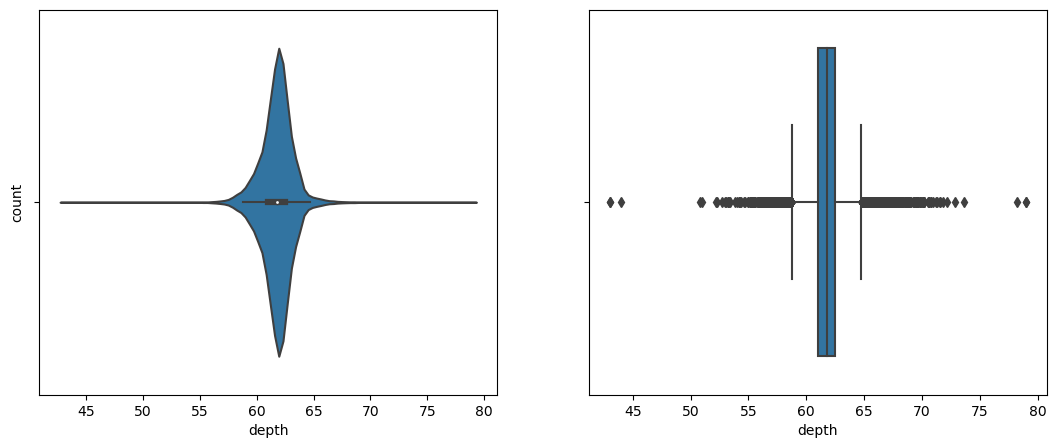

table
Skewness :  0.797


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


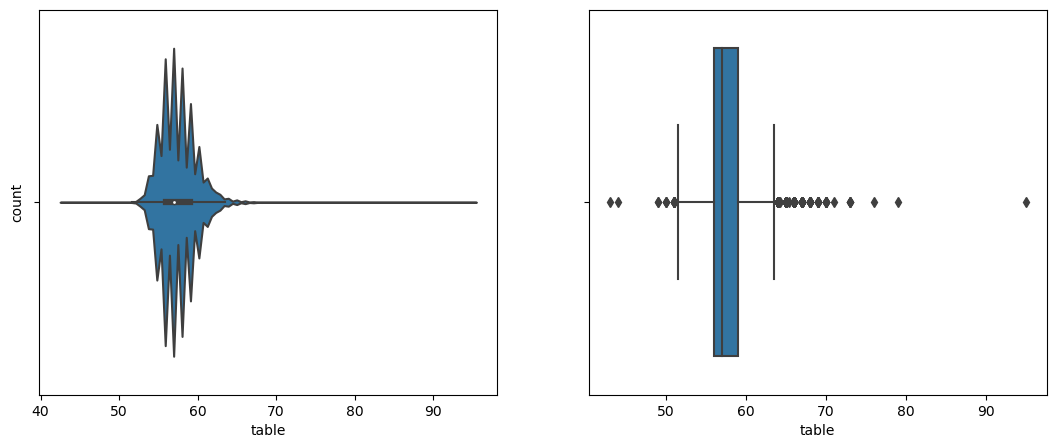

x
Skewness :  0.398


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


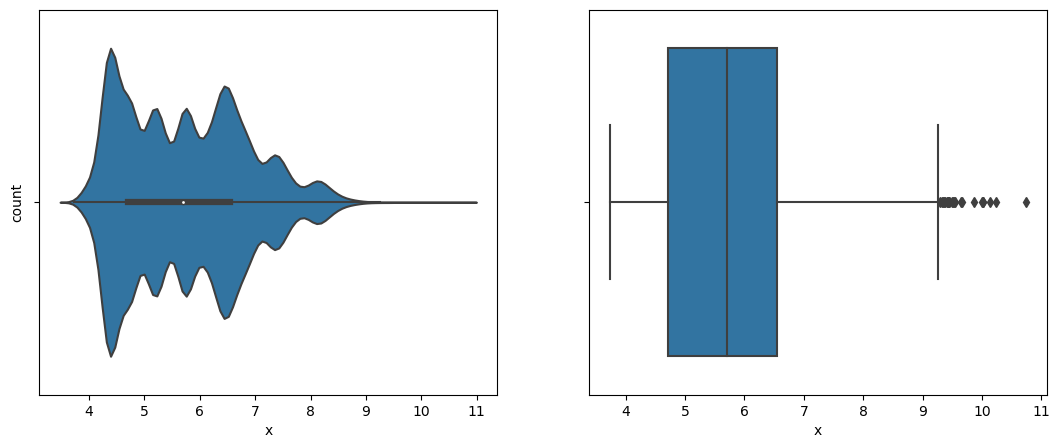

y
Skewness :  2.462


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


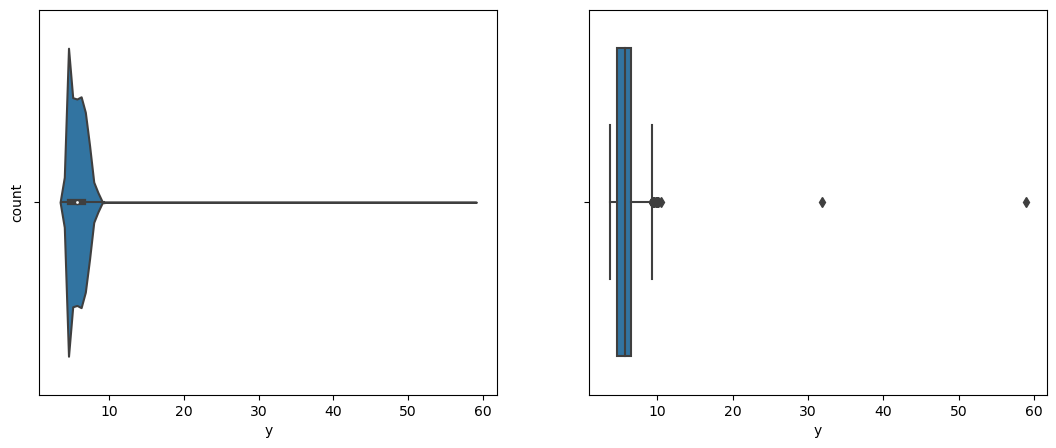

z
Skewness :  1.585


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


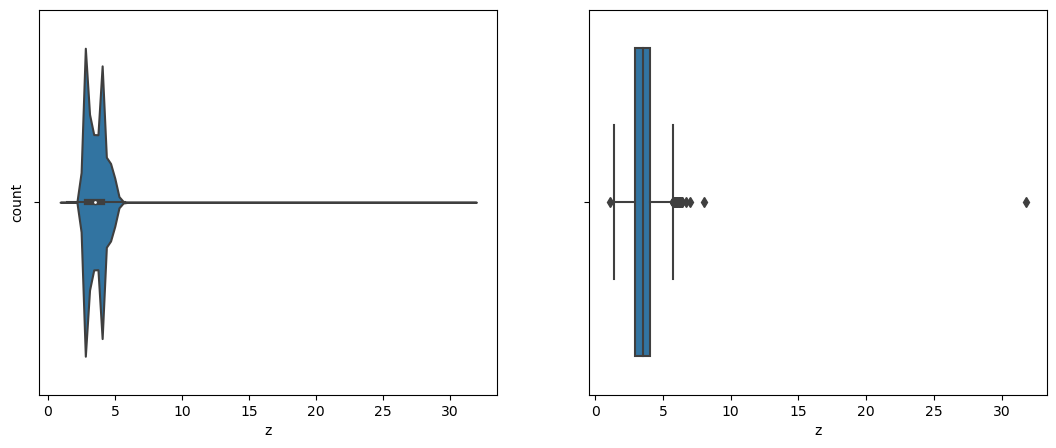

In [13]:
# Lets check outliers 

for i in num_cols.columns:
    if i !='price':
        print(i)
        print("Skewness : ", round(diamond[i].skew(),3))
        plt.figure(figsize=(13,5))
        plt.subplot(1,2,1)
        sns.violinplot(diamond[i])
        plt.ylabel('count')
        plt.subplot(1,2,2)
        sns.boxplot(x=diamond[i])
        plt.show()    

In [14]:
cat_cols.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


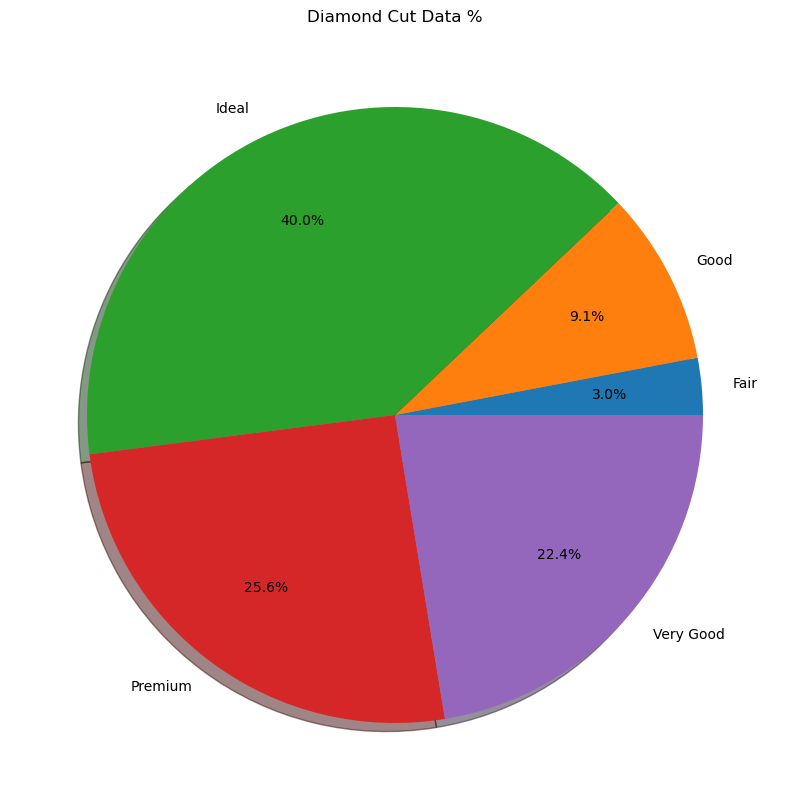

In [15]:
labels, counts = np.unique(diamond.cut, return_counts=True)
plt.figure(figsize = (10,10))
plt.pie(counts, autopct='%1.1f%%', labels=labels, pctdistance=0.7,shadow=True,counterclock=True,normalize=True,)
plt.title('Diamond Cut Data %')
plt.show()

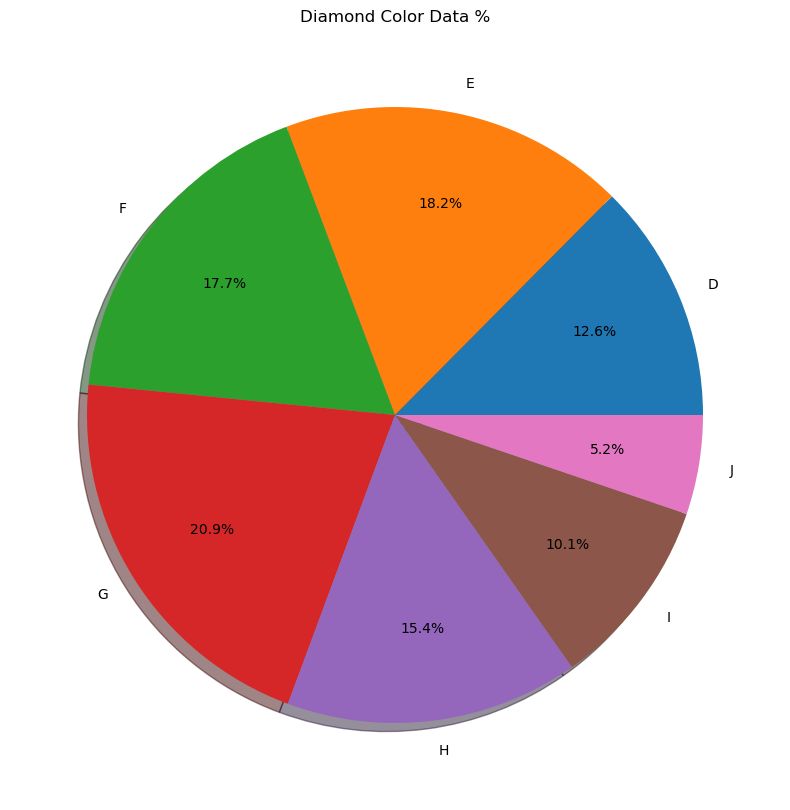

In [16]:
labels, counts = np.unique(diamond.color, return_counts=True)
plt.figure(figsize = (10,10))
plt.pie(counts, autopct='%1.1f%%', labels=labels, pctdistance=0.7,shadow=True,counterclock=True,normalize=True,)
plt.title('Diamond Color Data %')
plt.show()

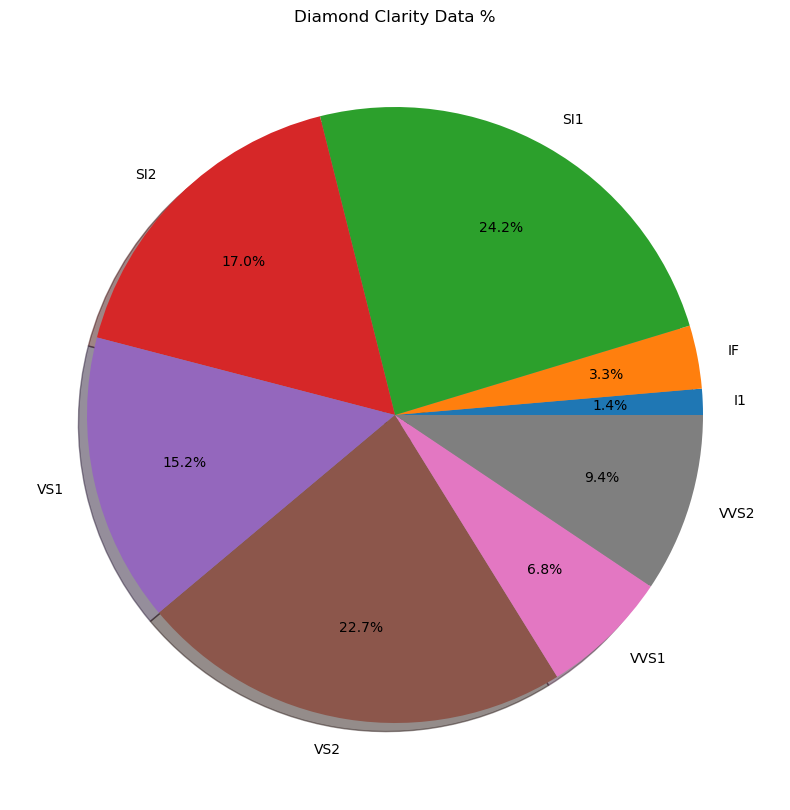

In [17]:
labels, counts = np.unique(diamond.clarity, return_counts=True)
plt.figure(figsize = (10,10))
plt.pie(counts, autopct='%1.1f%%', labels=labels, pctdistance=0.7,shadow=True,counterclock=True,normalize=True,)
plt.title('Diamond Clarity Data %')
plt.show()

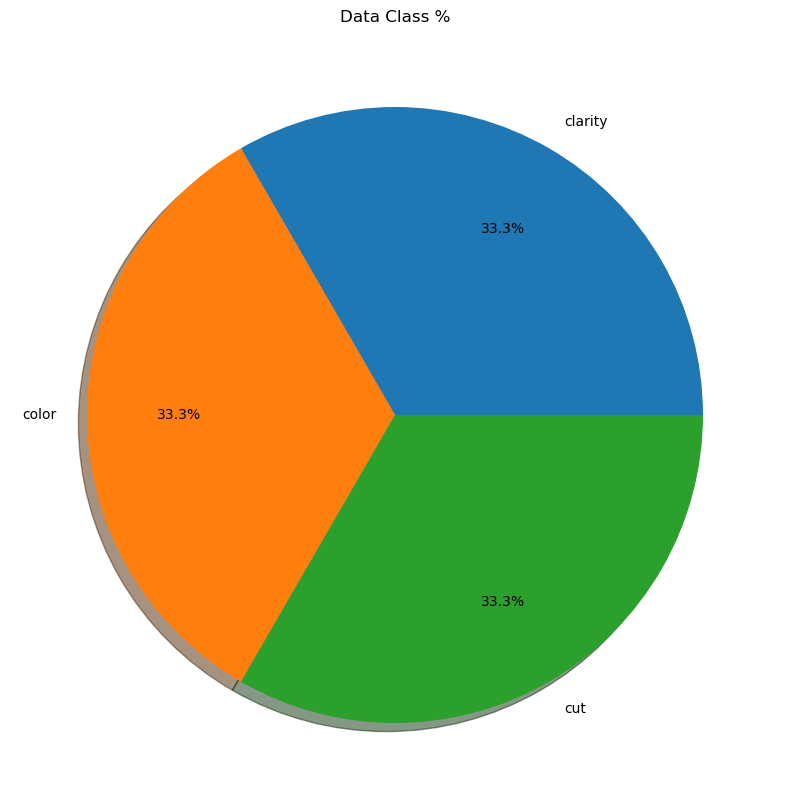

In [18]:
labels, counts = np.unique(cat_cols.columns, return_counts=True)
plt.figure(figsize = (10,10))
plt.pie(counts, autopct='%1.1f%%', labels=labels, pctdistance=0.7,shadow=True,counterclock=True,normalize=True,)
plt.title('Data Class %')
plt.show()

In [19]:
#Dropping the outliers. 
diamond = diamond[(diamond["depth"]<75)&(diamond["depth"]>45)]
diamond = diamond[(diamond["table"]<80)&(diamond["table"]>40)]
diamond = diamond[(diamond["x"]<30)]
diamond = diamond[(diamond["y"]<30)]
diamond = diamond[(diamond["z"]<30)&(diamond["z"]>2)]

In [20]:
diamond.shape # data point has been reduced after removal of outlier

(53907, 10)

LETS DO LABEL ENCODING OF DATA FOR OBJECT TYPE

In [21]:
# Make copy to avoid changing original data 
label_data = diamond.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in cat_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])

In [22]:
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


FINDING CORELATION BETWEEN DATA

In [23]:
label_data.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.017354,0.291307,-0.214143,0.029267,0.181797,0.921590,0.977777,0.976860,0.977037
cut,0.017354,1.000000,0.000177,0.028091,-0.195841,0.152591,0.039980,0.022166,0.028033,0.000809
color,0.291307,0.000177,1.000000,-0.027710,0.049040,0.026982,0.172358,0.270603,0.270408,0.275183
clarity,-0.214143,0.028091,-0.027710,1.000000,-0.053510,-0.088240,-0.071512,-0.225906,-0.222956,-0.229976
depth,0.029267,-0.195841,0.049040,-0.053510,1.000000,-0.302218,-0.010287,-0.024401,-0.027543,0.097525
table,0.181797,0.152591,0.026982,-0.088240,-0.302218,1.000000,0.127108,0.196327,0.190153,0.155670
price,0.921590,0.039980,0.172358,-0.071512,-0.010287,0.127108,1.000000,0.887212,0.888807,0.882634
x,0.977777,0.022166,0.270603,-0.225906,-0.024401,0.196327,0.887212,1.000000,0.998657,0.991665
y,0.976860,0.028033,0.270408,-0.222956,-0.027543,0.190153,0.888807,0.998657,1.000000,0.991327
z,0.977037,0.000809,0.275183,-0.229976,0.097525,0.155670,0.882634,0.991665,0.991327,1.000000


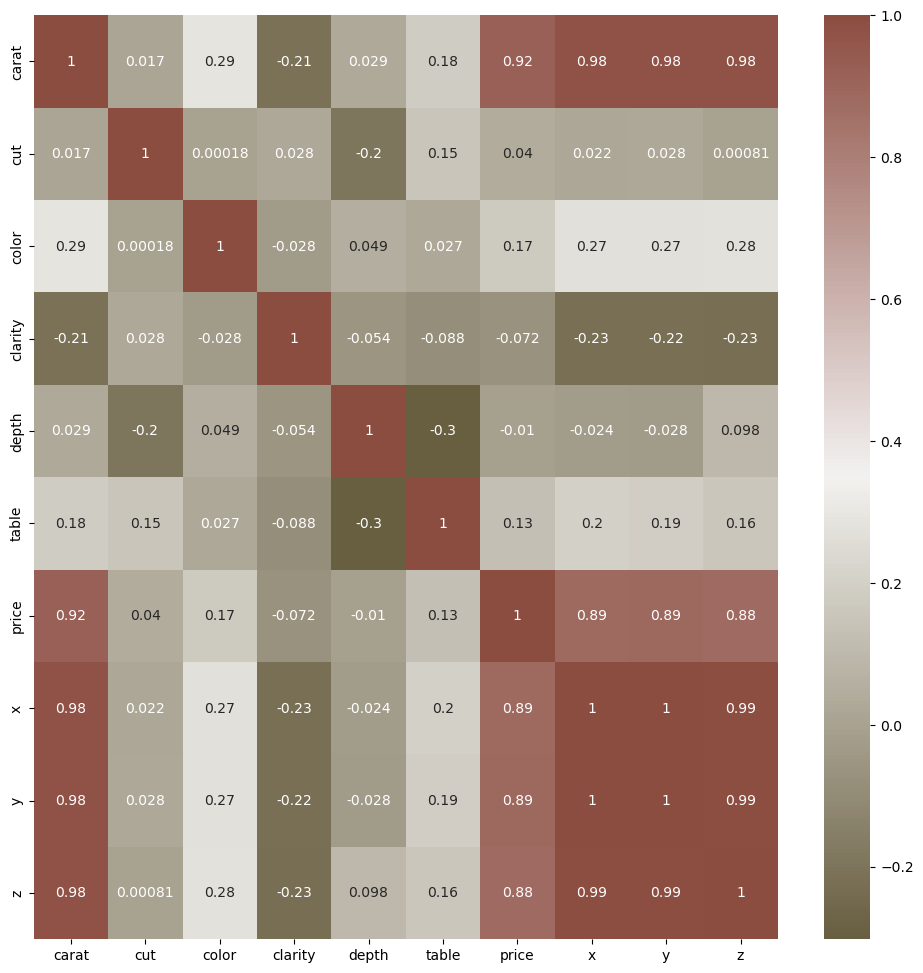

In [24]:
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True)
plt.show()

"x", "y" and "z" show a high correlation to target column.
"depth", "cut" and "table" show low correlation. We could consider dropping but let's keep

Seprating Target Variables

In [25]:
# Assigning the featurs as X and trarget as y
X= label_data.drop(["price"],axis =1)
y= label_data["price"]

Test Train Split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=42)

Checking of Model

In [27]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [28]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1347.692979 
DecisionTree: -749.106066 
RandomForest: -552.164627 
KNeighbors: -820.801253 
XGBRegressor: -549.671990 


Or We Can Use

In [29]:
from lazypredict.Supervised import LazyRegressor

In [30]:
# Create and fit the LazyRegressor model
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Print the performance of each model
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [12:58<00:00, 18.54s/it]

                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
XGBRegressor                                 0.98       0.98  537.60   
LGBMRegressor                                0.98       0.98  538.72   
ExtraTreesRegressor                          0.98       0.98  540.00   
HistGradientBoostingRegressor                0.98       0.98  547.58   
RandomForestRegressor                        0.98       0.98  551.49   
BaggingRegressor                             0.98       0.98  576.41   
GradientBoostingRegressor                    0.97       0.97  660.45   
DecisionTreeRegressor                        0.96       0.96  753.44   
ExtraTreeRegressor                           0.96       0.96  754.34   
KNeighborsRegressor                          0.96       0.96  810.91   
MLPRegressor                                 0.93       0.93 1036.10   
PoissonRegressor                             0.92       0.92 109

Lets Try XGBoost

In [31]:
pred = pipeline_xgb.predict(X_test)

Model Evaluation

In [32]:
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9809479919859321
Adjusted R^2: 0.9809352595234588
MAE: 272.4707478744531
MSE: 289011.92746749293
RMSE: 537.5982956329874


# Created By Bharat Kulmani

follow me on my LinkedIn:-https://www.linkedin.com/in/bharat-kulmani-40b9a49a